<a href="https://colab.research.google.com/github/MarquezGonzalez/FinallProyADPythonAndyMG/blob/main/FinallProyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final de Análisis de datos con Python. Machine Learning aplicada a los estados de intercara en los cristales fotónicos.
### Autor: Andy Márquez González.



Con objeto de analizar la aparición de un estado de interface se busca crear un modelo capaz de, a partir de una data generada de cristales fotónicos que muestran esta característica, y otra de cristales que no la muestran, determinar si un cristal determinado es o no un cristal con estado de intercara.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
from sklearn import datasets 
from sklearn import tree

Primero importamos los datos de los cristales que no muestran y muestran esta característica, respectivamente, recepcionando los datos en un dataframe de Pandas.

In [ ]:
Nocur = pd.read_csv('https://raw.githubusercontent.com/MarquezGonzalez/FinallProyADPythonAndyMG/main/Nocurrencia.txt')
Nocur

epsilon1a  mhu1a  epsilon1b  mhu1b  epsilon2a  mhu2a  \
0        {1.489978779080475      1          1      1   5.321507      1   
1       {2.0248520831744417      1          1      1   4.359914      1   
2       {1.2697035329957806      1          1      1   5.871012      1   
3       {1.4812474883528093      1          1      1   4.876062      1   
4        {2.691134934618595      1          1      1   3.784917      1   
...                     ...    ...        ...    ...        ...    ...   
14995  {0.39716132645015056      1          1      1   0.198949      1   
14996                   {0.      1          1      1   0.000000      1   
14997   {3.9484137073036596      1          1      1   0.932415      1   
14998    {4.464337634621641      1          1      1   1.453078      1   
14999   {3.1085161188817847      1          1      1   0.410064      1   

       epsilon2b  mhu2b       d1a       d1b       d2a       d2b  N1    N2  
0              1      1  0.626334  0.373666  0.305111  0.694889  13   13}  
1              1      1  0.439179  0.560821  0.366467  0.633533  17   17}  
2              1      1  0.868496  0.131504  0.280201  0.719799  19   19}  
3              1      1  0.519542  0.480458  0.330026  0.669974  11   11}  
4              1      1  0.378638  0.621362  0.421721  0.578279  19   19}  
...          ...    ...       ...       ...       ...       ...  ..   ...  
14995          1      1  0.099474  0.900526  0.198581  0.801419  12   12}  
14996          1      1  0.509153  0.490847  0.157865  0.842135  10   10}  
14997          1      1  0.233104  0.766896  0.987103  0.012897  14   14}  
14998          1      1  0.290616  0.709384  0.892868  0.107132  15   15}  
14999          1      1  0.068344  0.931656  0.518086  0.481914  16   16}  

[15000 rows x 14 columns]

In [ ]:
Ocur = pd.read_csv('https://raw.githubusercontent.com/MarquezGonzalez/FinallProyADPythonAndyMG/main/Ocurrencia.txt')
Ocur

epsilon1a  mhu1a  epsilon1b  mhu1b  epsilon2a  mhu2a  \
0      {2.303189723371972      1          1      1   5.696810      1   
1      {5.444828582029056      1          1      1   2.555171      1   
2      {2.645269277208455      1          1      1   5.354731      1   
3      {5.938240747986517      1          1      1   2.061759      1   
4      {4.442565685874454      1          1      1   3.557434      1   
...                   ...    ...        ...    ...        ...    ...   
4995   {5.765706025394582      1          1      1   2.234294      1   
4996  {1.7967601666284616      1          1      1   6.203240      1   
4997   {6.151406433741872      1          1      1   1.848594      1   
4998   {6.584217070779379      1          1      1   1.415783      1   
4999   {3.549601697708341      1          1      1   4.450398      1   

      epsilon2b  mhu2b       d1a       d1b       d2a       d2b  N1    N2  
0             1      1  0.770307  0.229693  0.287519  0.712481  13   13}  
1             1      1  0.299030  0.700970  0.666228  0.333772  18   18}  
2             1      1  0.636515  0.363485  0.303442  0.696558  13   13}  
3             1      1  0.277503  0.722497  0.914767  0.085233  13   13}  
4             1      1  0.359950  0.640050  0.449976  0.550024  15   15}  
...         ...    ...       ...       ...       ...       ...  ..   ...  
4995          1      1  0.284566  0.715434  0.805915  0.194085  12   12}  
4996          1      1  1.171247  0.171247  0.267492  0.732508  17   17}  
4997          1      1  0.269376  0.730624  1.108726  0.108726  13   13}  
4998          1      1  0.254622  0.745378  2.100057  1.100057  19   19}  
4999          1      1  0.451033  0.548967  0.359348  0.640652  17   17}  

[5000 rows x 14 columns]

Ahora debemos hacer un preprocesamiento de datos para indicar que juegos de valores cumplen con lo buscado y cuales no. Primero se agrega una nueva columna ¨class¨ con un valor (en notación booleana, no como tipo booleano) que indica si este juego de datos pertenece a un cristal que cumple (1) o no la condición (0). Además se eliminan caractéres innecesarios y se visualizan las posibles relacines entre ellos, a fin d determinar el modelo a aplicar.

In [ ]:
Ocur['class'] = 1
Nocur['class'] = 0
data=pd.concat([Ocur,Nocur],ignore_index=True,axis=0)
data
data['epsilon1a'] = data['epsilon1a'].replace('\{','',regex=True).astype(float)
data['N2'] =data['N2'].replace('\}','',regex=True).astype(int)
data

epsilon1a  mhu1a  epsilon1b  mhu1b  epsilon2a  mhu2a  epsilon2b  mhu2b  \
0       2.303190      1          1      1   5.696810      1          1      1   
1       5.444829      1          1      1   2.555171      1          1      1   
2       2.645269      1          1      1   5.354731      1          1      1   
3       5.938241      1          1      1   2.061759      1          1      1   
4       4.442566      1          1      1   3.557434      1          1      1   
...          ...    ...        ...    ...        ...    ...        ...    ...   
19995   0.397161      1          1      1   0.198949      1          1      1   
19996   0.000000      1          1      1   0.000000      1          1      1   
19997   3.948414      1          1      1   0.932415      1          1      1   
19998   4.464338      1          1      1   1.453078      1          1      1   
19999   3.108516      1          1      1   0.410064      1          1      1   

            d1a       d1b       d2a       d2b  N1  N2  class  
0      0.770307  0.229693  0.287519  0.712481  13  13      1  
1      0.299030  0.700970  0.666228  0.333772  18  18      1  
2      0.636515  0.363485  0.303442  0.696558  13  13      1  
3      0.277503  0.722497  0.914767  0.085233  13  13      1  
4      0.359950  0.640050  0.449976  0.550024  15  15      1  
...         ...       ...       ...       ...  ..  ..    ...  
19995  0.099474  0.900526  0.198581  0.801419  12  12      0  
19996  0.509153  0.490847  0.157865  0.842135  10  10      0  
19997  0.233104  0.766896  0.987103  0.012897  14  14      0  
19998  0.290616  0.709384  0.892868  0.107132  15  15      0  
19999  0.068344  0.931656  0.518086  0.481914  16  16      0  

[20000 rows x 15 columns]

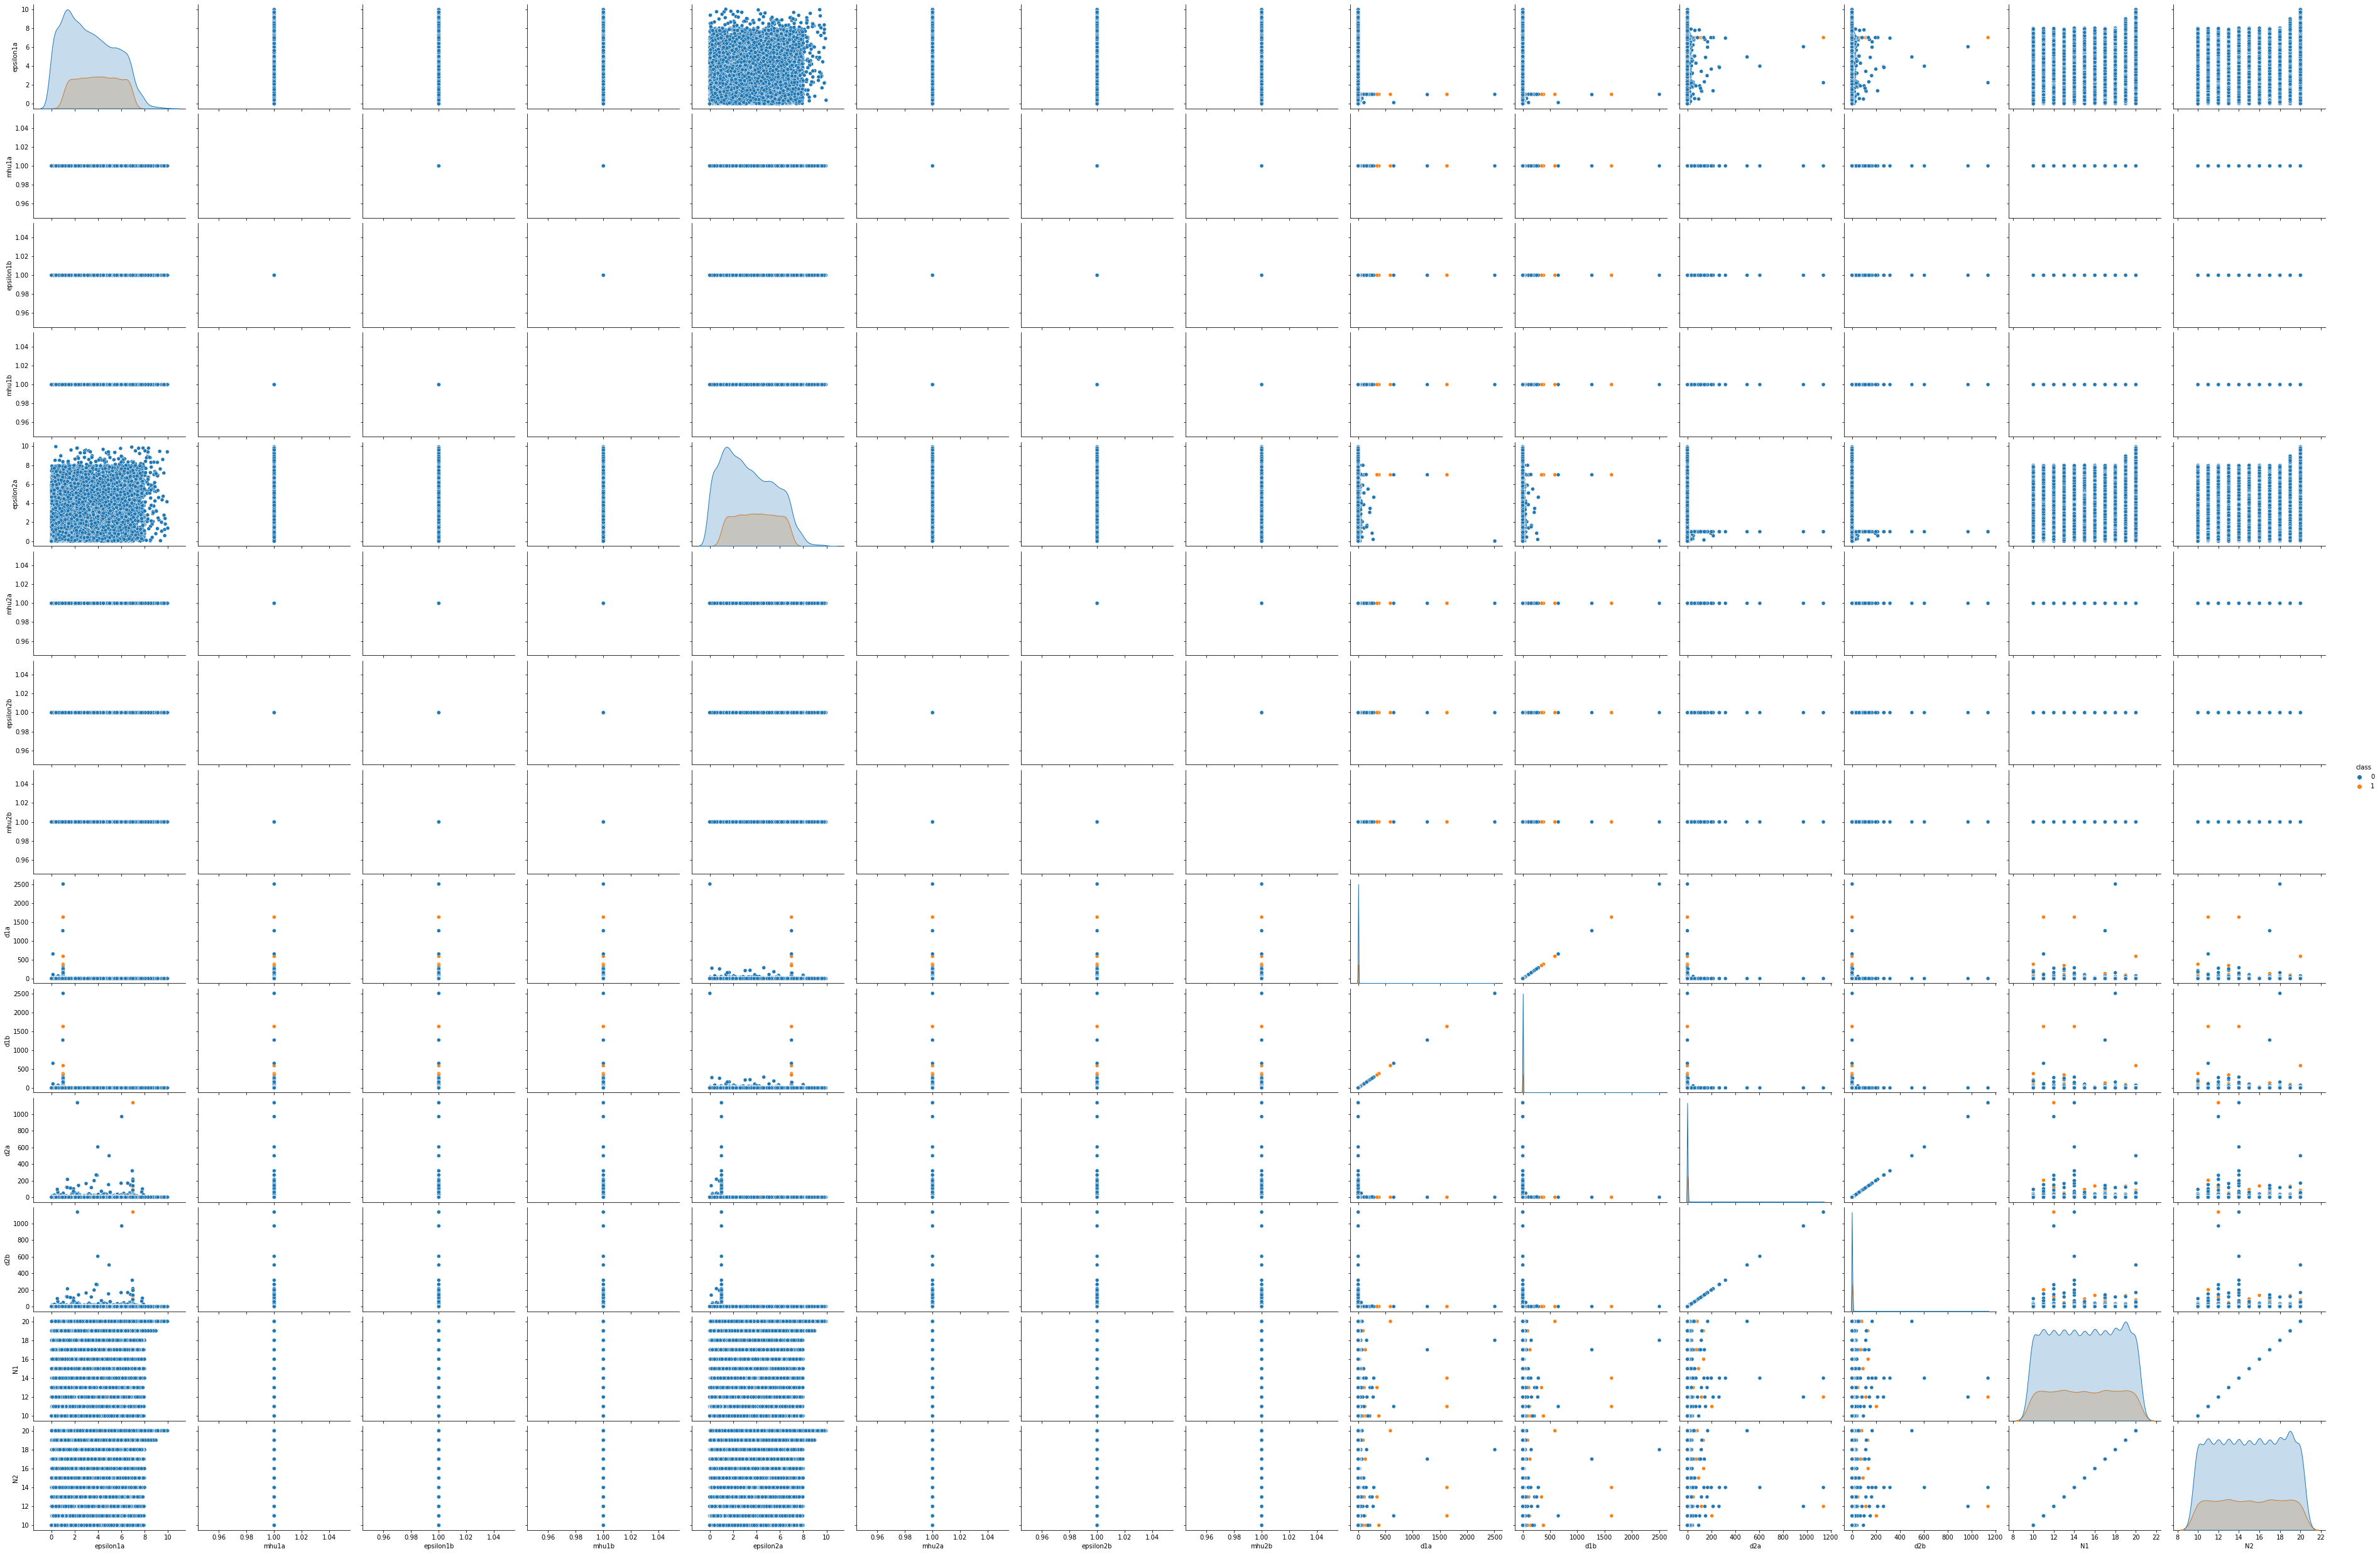

In [ ]:
sn.pairplot(data, hue='class', aspect=1.5)
plt.show()

Algunos de los datos no tienen sentido: hay anchos relativos mayores que 1, lo cualno es posible, estos se eliminan  se vuelve a visualizar lo que resta, incluida la correlación entre datos.

In [ ]:
dataclean=data[(data['d1b'] + data['d1a'] > 0.9) & (data['d1b'] + data['d1a'] <1.1) & (data['d2b'] + data['d2a'] > 0.9) & (data['d2b'] + data['d2a'] <1.1)]

dataclean=dataclean[(dataclean['d1a'] > 0) & (dataclean['d1b'] > 0) & (dataclean['d2a'] > 0) & (dataclean['d2b'] > 0)]
dataclean

epsilon1a  mhu1a  epsilon1b  mhu1b  epsilon2a  mhu2a  epsilon2b  mhu2b  \
0       2.303190      1          1      1   5.696810      1          1      1   
1       5.444829      1          1      1   2.555171      1          1      1   
2       2.645269      1          1      1   5.354731      1          1      1   
3       5.938241      1          1      1   2.061759      1          1      1   
4       4.442566      1          1      1   3.557434      1          1      1   
...          ...    ...        ...    ...        ...    ...        ...    ...   
19995   0.397161      1          1      1   0.198949      1          1      1   
19996   0.000000      1          1      1   0.000000      1          1      1   
19997   3.948414      1          1      1   0.932415      1          1      1   
19998   4.464338      1          1      1   1.453078      1          1      1   
19999   3.108516      1          1      1   0.410064      1          1      1   

            d1a       d1b       d2a       d2b  N1  N2  class  
0      0.770307  0.229693  0.287519  0.712481  13  13      1  
1      0.299030  0.700970  0.666228  0.333772  18  18      1  
2      0.636515  0.363485  0.303442  0.696558  13  13      1  
3      0.277503  0.722497  0.914767  0.085233  13  13      1  
4      0.359950  0.640050  0.449976  0.550024  15  15      1  
...         ...       ...       ...       ...  ..  ..    ...  
19995  0.099474  0.900526  0.198581  0.801419  12  12      0  
19996  0.509153  0.490847  0.157865  0.842135  10  10      0  
19997  0.233104  0.766896  0.987103  0.012897  14  14      0  
19998  0.290616  0.709384  0.892868  0.107132  15  15      0  
19999  0.068344  0.931656  0.518086  0.481914  16  16      0  

[14611 rows x 15 columns]

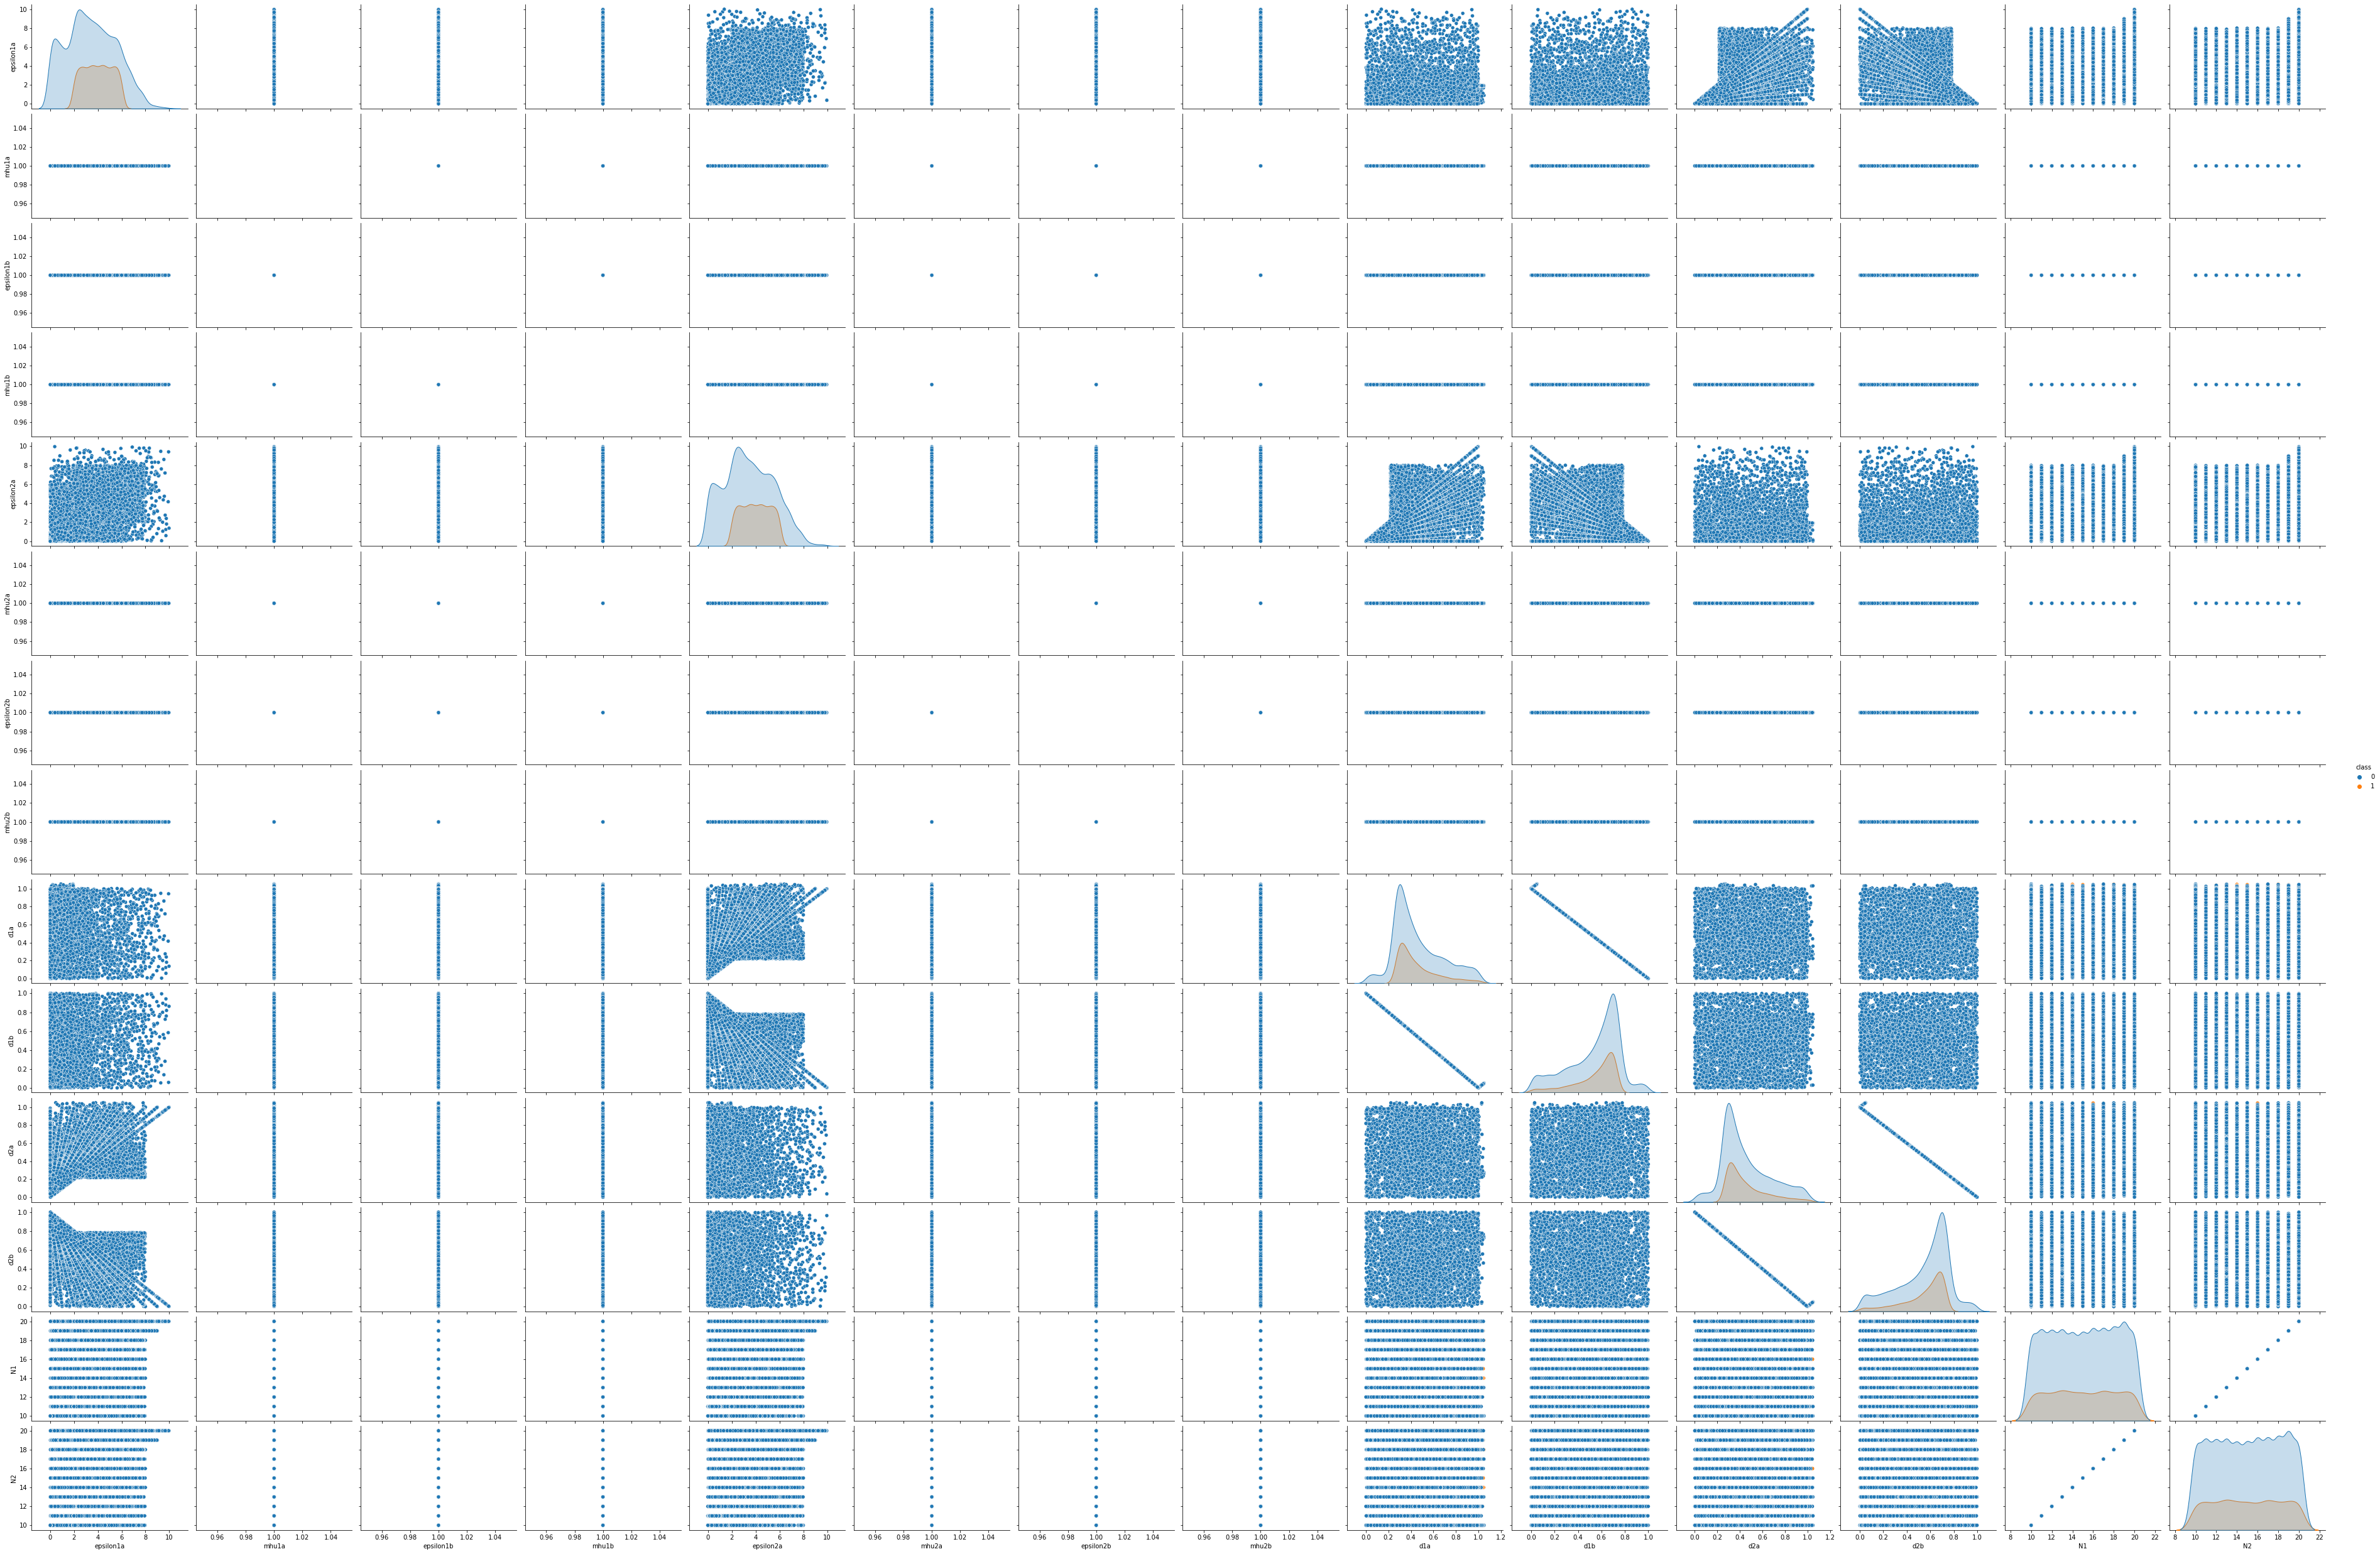

epsilon1a  mhu1a  epsilon1b  mhu1b  epsilon2a  mhu2a  epsilon2b  \
epsilon1a   1.000000    NaN        NaN    NaN   0.108932    NaN        NaN   
mhu1a            NaN    NaN        NaN    NaN        NaN    NaN        NaN   
epsilon1b        NaN    NaN        NaN    NaN        NaN    NaN        NaN   
mhu1b            NaN    NaN        NaN    NaN        NaN    NaN        NaN   
epsilon2a   0.108932    NaN        NaN    NaN   1.000000    NaN        NaN   
mhu2a            NaN    NaN        NaN    NaN        NaN    NaN        NaN   
epsilon2b        NaN    NaN        NaN    NaN        NaN    NaN        NaN   
mhu2b            NaN    NaN        NaN    NaN        NaN    NaN        NaN   
d1a        -0.470459    NaN        NaN    NaN   0.373644    NaN        NaN   
d1b         0.470793    NaN        NaN    NaN  -0.373583    NaN        NaN   
d2a         0.384248    NaN        NaN    NaN  -0.455964    NaN        NaN   
d2b        -0.384634    NaN        NaN    NaN   0.456304    NaN        NaN   
N1          0.162557    NaN        NaN    NaN   0.186297    NaN        NaN   
N2          0.162557    NaN        NaN    NaN   0.186297    NaN        NaN   
class       0.124961    NaN        NaN    NaN   0.123772    NaN        NaN   

           mhu2b       d1a       d1b       d2a       d2b        N1        N2  \
epsilon1a    NaN -0.470459  0.470793  0.384248 -0.384634  0.162557  0.162557   
mhu1a        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
epsilon1b    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
mhu1b        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
epsilon2a    NaN  0.373644 -0.373583 -0.455964  0.456304  0.186297  0.186297   
mhu2a        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
epsilon2b    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
mhu2b        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
d1a          NaN  1.000000 -0.999758 -0.263762  0.263903  0.003619  0.003619   
d1b          NaN -0.999758  1.000000  0.263690 -0.263813 -0.003530 -0.003530   
d2a          NaN -0.263762  0.263690  1.000000 -0.999726 -0.016758 -0.016758   
d2b          NaN  0.263903 -0.263813 -0.999726  1.000000  0.016691  0.016691   
N1           NaN  0.003619 -0.003530 -0.016758  0.016691  1.000000  1.000000   
N2           NaN  0.003619 -0.003530 -0.016758  0.016691  1.000000  1.000000   
class        NaN  0.005793 -0.005626  0.015728 -0.015632 -0.001766 -0.001766   

              class  
epsilon1a  0.124961  
mhu1a           NaN  
epsilon1b       NaN  
mhu1b           NaN  
epsilon2a  0.123772  
mhu2a           NaN  
epsilon2b       NaN  
mhu2b           NaN  
d1a        0.005793  
d1b       -0.005626  
d2a        0.015728  
d2b       -0.015632  
N1        -0.001766  
N2        -0.001766  
class      1.000000

In [ ]:
sn.pairplot(dataclean, hue='class', aspect=1.5)
plt.show()
dataclean.corr()

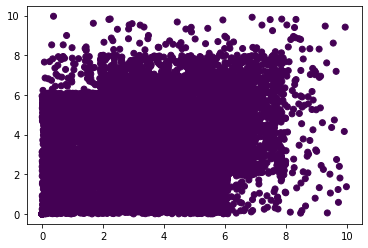

In [ ]:
plt.scatter(dataclean['epsilon1a'], dataclean['epsilon2a'], c=dataclean['class'])

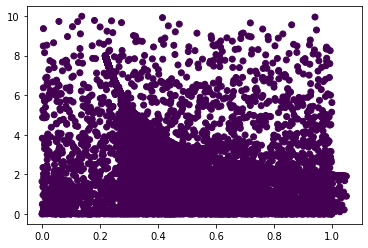

In [ ]:
plt.scatter(dataclean['d1a'], dataclean['epsilon1a'], c=dataclean['class'])

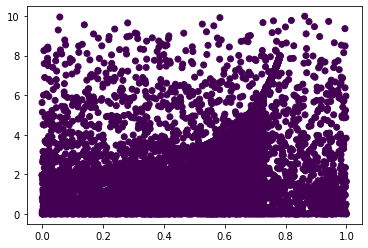

In [ ]:
plt.scatter(dataclean['d1b'], dataclean['epsilon1a'], c=dataclean['class'])

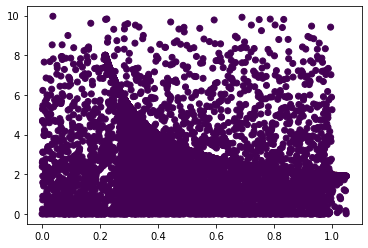

In [ ]:
plt.scatter(dataclean['d2a'], dataclean['epsilon2a'], c=dataclean['class'])

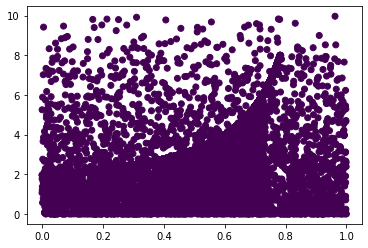

In [ ]:
plt.scatter(dataclean['d2b'], dataclean['epsilon2a'], c=dataclean['class'])

No ha sido posible visualizar lo deseado, por eso se toma una muestra más pequeña a fin de poder apreciar con claridad lo buscado.

In [ ]:
data2 = dataclean.sample(frac=0.1, random_state=5).reset_index()
data2

index  epsilon1a  mhu1a  epsilon1b  mhu1b  epsilon2a  mhu2a  epsilon2b  \
0     13542   3.039881      1          1      1   3.136128      1          1   
1      3242   5.373732      1          1      1   2.626268      1          1   
2      6959   0.219941      1          1      1   3.793690      1          1   
3     19693   1.723255      1          1      1   0.900863      1          1   
4      2650   5.455569      1          1      1   2.544431      1          1   
...     ...        ...    ...        ...    ...        ...    ...        ...   
1456  11951   2.478818      1          1      1   3.769576      1          1   
1457   1011   2.856787      1          1      1   5.143213      1          1   
1458   2860   2.896833      1          1      1   5.103167      1          1   
1459   7012   1.059241      1          1      1   2.677245      1          1   
1460   9515   4.229418      1          1      1   0.728518      1          1   

      mhu2b       d1a       d1b       d2a       d2b  N1  N2  class  
0         1  0.536271  0.463729  0.517220  0.482780  20  20      0  
1         1  0.302497  0.697503  0.642517  0.357483  20  20      1  
2         1  0.379408  0.620592  0.420718  0.579282  20  20      0  
3         1  0.225216  0.774784  0.430814  0.569186  14  14      0  
4         1  0.298515  0.701485  0.669993  0.330007  12  12      1  
...     ...       ...       ...       ...       ...  ..  ..    ...  
1456      1  0.694138  0.305862  0.423488  0.576512  13  13      0  
1457      1  0.577701  0.422299  0.314490  0.685510  14  14      1  
1458      1  0.567986  0.432014  0.316700  0.683300  11  11      1  
1459      1  0.305048  0.694952  0.626710  0.373290  16  16      0  
1460      1  0.377388  0.622612  0.423372  0.576628  18  18      0  

[1461 rows x 16 columns]

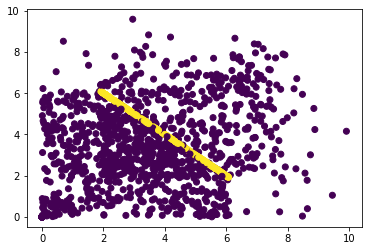

In [ ]:
plt.scatter(data2['epsilon1a'], data2['epsilon2a'], c=data2['class'])

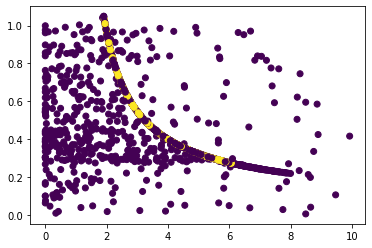

In [ ]:
plt.scatter(data2['epsilon1a'], data2['d1a'], c=data2['class'])

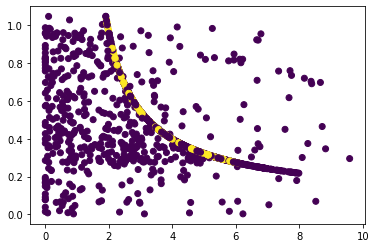

In [ ]:
plt.scatter(data2['epsilon2a'], data2['d2a'], c=data2['class'])

Los parámetros epsilon1a, epsilon2a, d1a y d2a parecen suficientes para nuestro análisis; se descartan todos los otros y se repite el procedimiento anterior.

In [ ]:
data3=dataclean.drop(['mhu1a', 'epsilon1b', 'mhu1b','mhu2a', 'epsilon2b', 'mhu2b','d1b','d2b','N1','N2'], 
       axis=1)
data3

epsilon1a  epsilon2a       d1a       d2a  class
0       2.303190   5.696810  0.770307  0.287519      1
1       5.444829   2.555171  0.299030  0.666228      1
2       2.645269   5.354731  0.636515  0.303442      1
3       5.938241   2.061759  0.277503  0.914767      1
4       4.442566   3.557434  0.359950  0.449976      1
...          ...        ...       ...       ...    ...
19995   0.397161   0.198949  0.099474  0.198581      0
19996   0.000000   0.000000  0.509153  0.157865      0
19997   3.948414   0.932415  0.233104  0.987103      0
19998   4.464338   1.453078  0.290616  0.892868      0
19999   3.108516   0.410064  0.068344  0.518086      0

[14611 rows x 5 columns]

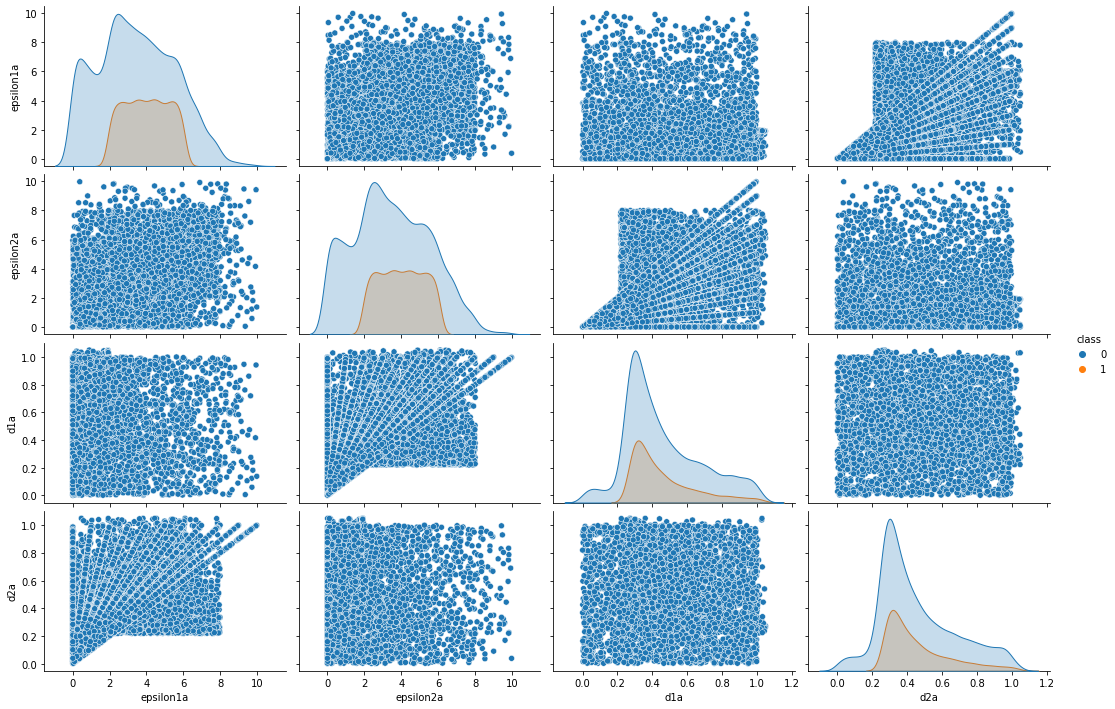

epsilon1a  epsilon2a       d1a       d2a     class
epsilon1a   1.000000   0.108932 -0.470459  0.384248  0.124961
epsilon2a   0.108932   1.000000  0.373644 -0.455964  0.123772
d1a        -0.470459   0.373644  1.000000 -0.263762  0.005793
d2a         0.384248  -0.455964 -0.263762  1.000000  0.015728
class       0.124961   0.123772  0.005793  0.015728  1.000000

In [ ]:
sn.pairplot(data3, hue='class', aspect=1.5)
plt.show()
data3.corr()

In [ ]:
data4 = data3.sample(frac=0.1, random_state=6).reset_index()

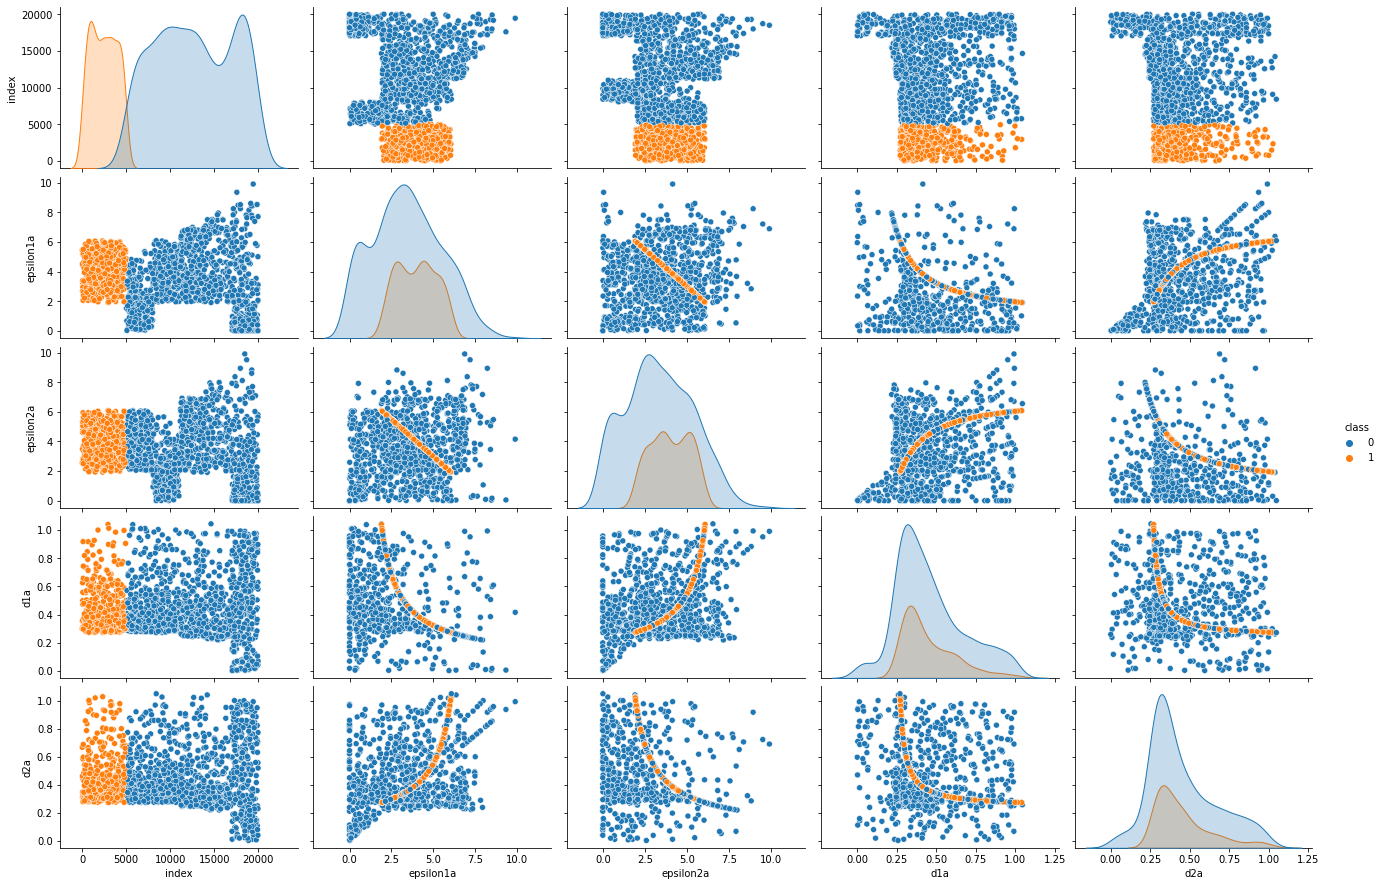

index  epsilon1a  epsilon2a       d1a       d2a     class
index      1.000000  -0.070884  -0.171473  0.026503  0.024981 -0.754883
epsilon1a -0.070884   1.000000   0.085117 -0.492705  0.412569  0.132828
epsilon2a -0.171473   0.085117   1.000000  0.361550 -0.444056  0.152337
d1a        0.026503  -0.492705   0.361550  1.000000 -0.282544 -0.007832
d2a        0.024981   0.412569  -0.444056 -0.282544  1.000000  0.011847
class     -0.754883   0.132828   0.152337 -0.007832  0.011847  1.000000

In [ ]:
sn.pairplot(data4, hue='class', aspect=1.5)
plt.show()
data4.corr()

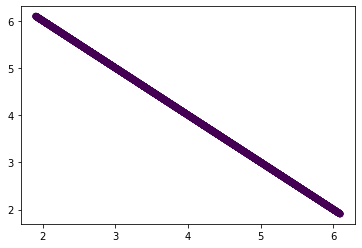

In [ ]:
data3v = data3[data3['class']==1]
plt.scatter(data3v['epsilon1a'], data3v['epsilon2a'], c=data3v['class'])

La solución parece clara, hay una relación lineal entre epsilon1a y epsilon2a, aunque aún hay datos con class=0 que están sobre esta línea, eliminemos los más distantes y entrenemos un árbol de decisiones, con la esperanza de que reconozca alguna de las otras relaciones que parece haber entre los datos. Esta sabemos que existe, pero es útil ver si es posible encontrar una sencilla que no tiene que ser la relación analítica compleja con la que se generaron los datos.

In [ ]:
data5=data3[(data3['epsilon1a'] + data3['epsilon2a'] > 7.9) & (data3['epsilon1a'] + data3['epsilon2a'] < 8.1)]
data5

epsilon1a  epsilon2a       d1a       d2a  class
0       2.303190   5.696810  0.770307  0.287519      1
1       5.444829   2.555171  0.299030  0.666228      1
2       2.645269   5.354731  0.636515  0.303442      1
3       5.938241   2.061759  0.277503  0.914767      1
4       4.442566   3.557434  0.359950  0.449976      1
...          ...        ...       ...       ...    ...
19583   5.038654   2.899348  0.362418  0.629832      0
19668   4.945531   2.985998  0.497666  0.824255      0
19688   2.588011   5.491817  0.784545  0.369716      0
19794   7.743937   0.246783  0.027420  0.860437      0
19875   5.772834   2.270370  0.283796  0.721604      0

[3760 rows x 5 columns]

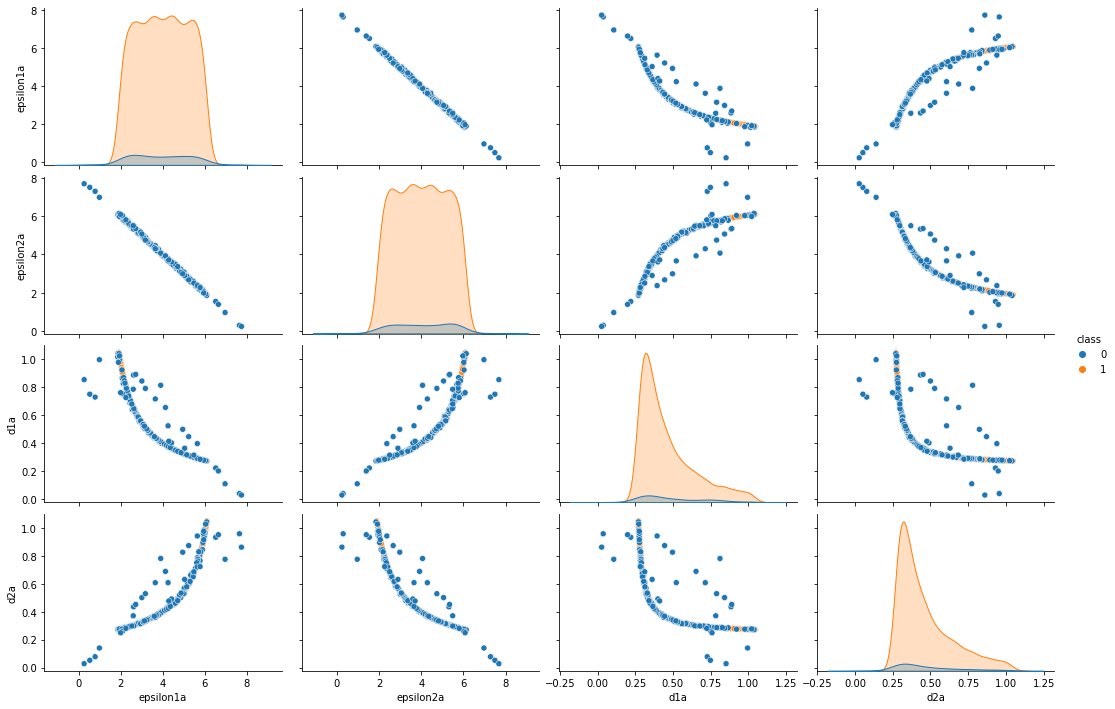

epsilon1a  epsilon2a       d1a       d2a     class
epsilon1a   1.000000  -0.999925 -0.914746  0.915421  0.014621
epsilon2a  -0.999925   1.000000  0.914568 -0.915598 -0.009799
d1a        -0.914746   0.914568  1.000000 -0.720692 -0.034525
d2a         0.915421  -0.915598 -0.720692  1.000000 -0.015754
class       0.014621  -0.009799 -0.034525 -0.015754  1.000000

In [ ]:
sn.pairplot(data5, hue='class', aspect=1.5)
plt.show()
data5.corr()

In [ ]:
data5v = data5[data5['class']==1]
data5v.corr()

epsilon1a  epsilon2a       d1a       d2a  class
epsilon1a   1.000000  -1.000000 -0.915474  0.916283    NaN
epsilon2a  -1.000000   1.000000  0.915474 -0.916283    NaN
d1a        -0.915474   0.915474  1.000000 -0.723164    NaN
d2a         0.916283  -0.916283 -0.723164  1.000000    NaN
class            NaN        NaN       NaN       NaN    NaN

In [ ]:
learn = data5.sample(frac=0.7, random_state=9)
test = data5.drop(learn.index)
learn=learn.reset_index()
test=test.reset_index()

In [ ]:
learn=learn.drop(['index'], axis=1)
learn

epsilon1a  epsilon2a       d1a       d2a  class
0      5.062175   2.937825  0.319003  0.558440      1
1      5.138838   2.861162  0.314730  0.576620      1
2      4.211154   3.788846  0.378982  0.421271      1
3      5.274903   2.754291  0.307493  0.604499      0
4      5.749160   2.250840  0.285268  0.797016      1
...         ...        ...       ...       ...    ...
2627   5.026097   2.941425  0.319208  0.557620      0
2628   5.193860   2.806140  0.311751  0.590578      1
2629   2.937807   5.062193  0.558444  0.319002      1
2630   6.085327   1.914673  0.271829  1.039127      1
2631   2.833984   5.166016  0.583414  0.313249      1

[2632 rows x 5 columns]

In [ ]:
test=test.drop(['index'], axis=1)
test

epsilon1a  epsilon2a       d1a       d2a  class
0      2.303190   5.696810  0.770307  0.287519      1
1      5.444829   2.555171  0.299030  0.666228      1
2      5.938241   2.061759  0.277503  0.914767      1
3      4.442566   3.557434  0.359950  0.449976      1
4      3.021749   4.978251  0.540053  0.323856      1
...         ...        ...       ...       ...    ...
1123   4.246806   3.658700  0.522671  0.606687      0
1124   4.281098   3.711541  0.412393  0.475678      0
1125   6.963255   0.970430  0.107826  0.773695      0
1126   2.588011   5.491817  0.784545  0.369716      0
1127   7.743937   0.246783  0.027420  0.860437      0

[1128 rows x 5 columns]

In [ ]:
grouplearn = learn.iloc[:, 0:-1]
classlearn = learn['class']
grouptest = test.iloc[:, 0:-1]
classtest = test['class']

In [ ]:
#Entrenar modelo
from sklearn.tree import DecisionTreeClassifier
mytree = DecisionTreeClassifier(max_depth=6, random_state = 50)
mytree.fit(grouplearn, classlearn)

DecisionTreeClassifier(max_depth=6, random_state=50)

Ahora evaluemos el modelo creado y veamos cómo ha funcionado.

In [ ]:
#Evaluar modelo construido
from sklearn import metrics
predctest = mytree.predict(grouptest)
metrics.accuracy_score(classtest, predctest)

0.9414893617021277

In [ ]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(classtest, predctest)
print(mytree.classes_)
conf_matrix

[0 1]


array([[   9,   64],
       [   2, 1053]])

El modelo es muy preciso, aunque vemos que priman los falsos positivos en los errores. Visualicemos ahora el árbol de decisión.

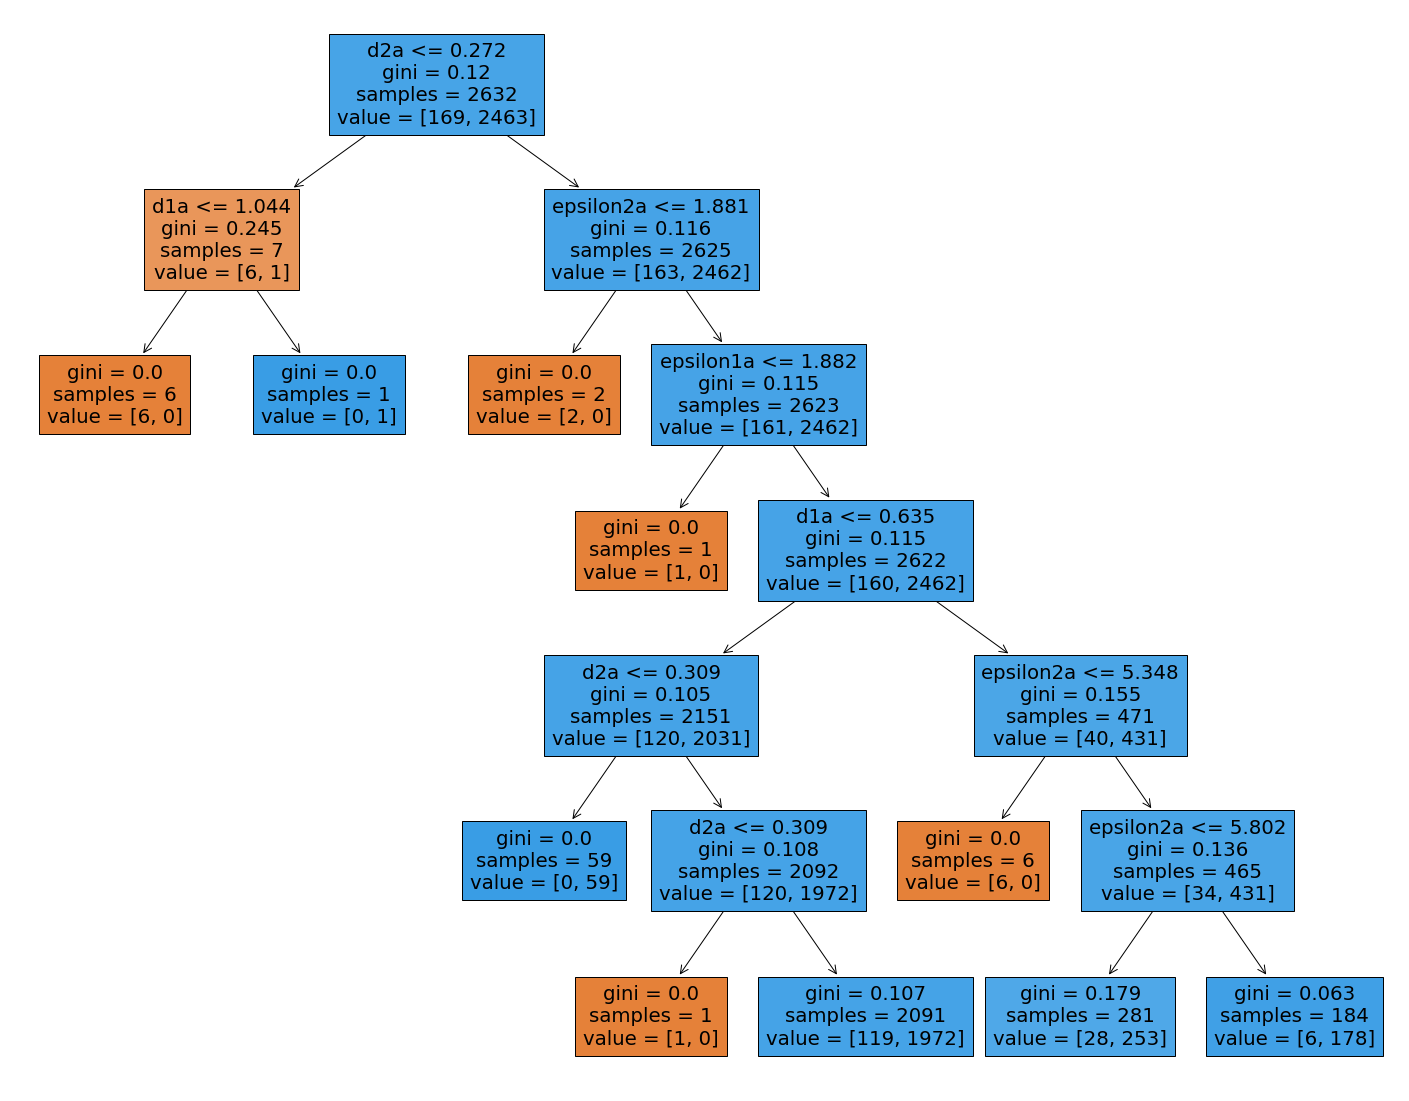

In [ ]:
#Mostrar modelo
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mytree,
                   feature_names=grouptest.columns,
                   filled=True)

Al principio era de suponer que la relación epsilon1a + epsilon2a = 8 sería la empleada, sin embargo esto no fue lo que escogió el algoritmo, curioso.

Veamos ahora otro árbol que no excluye los valores lejanos a la recta epsilon1a + epsilon2a = 8 para entrenar.

In [ ]:
data6=data3.drop(['epsilon1a'],axis=1)
data6 = data6.sample(frac=1, random_state=20).reset_index()
learn2 = data6.sample(frac=0.8, random_state=9)
test2 = data6.drop(learn2.index)
learn2 = learn2.reset_index()
test2 = test2.reset_index()
learn2 = learn2.drop(['index'], axis=1)
test2 = test2.drop(['index'], axis=1)
grouplearn2 = learn.iloc[:, 0:-1]
classlearn2 = learn['class']
grouptest2 = test.iloc[:, 0:-1]
classtest2 = test['class']
data6

index  epsilon2a       d1a       d2a  class
0       2658   3.766176  0.377006  0.423883      1
1       1520   5.841325  0.849732  0.281414      1
2       6917   4.275700  0.428815  0.373422      0
3      18748   3.387394  0.564566  0.962129      0
4      17720   2.927776  0.731944  0.805602      0
...      ...        ...       ...       ...    ...
14606  13625   6.641635  0.259772  0.252820      0
14607  10084   1.908636  0.887497  0.279046      0
14608  10542   0.714090  0.318041  0.562357      0
14609   6186   4.802416  0.505889  0.334663      0
14610  15463   2.883414  0.221159  0.571197      0

[14611 rows x 5 columns]

In [ ]:
#Entrenar modelo
from sklearn.tree import DecisionTreeClassifier
mytree2 = DecisionTreeClassifier(max_depth=6, random_state = 50)
mytree2.fit(grouplearn2, classlearn2)

DecisionTreeClassifier(max_depth=6, random_state=50)

In [ ]:
#Evaluar modelo construido
from sklearn import metrics
predctest2 = mytree2.predict(grouptest2)
metrics.accuracy_score(classtest2, predctest2)

0.9414893617021277

In [ ]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix as confn_matrix
conf_matrix2 = confn_matrix(classtest2, predctest2)
print(mytree2.classes_)
conf_matrix2

[0 1]


array([[   9,   64],
       [   2, 1053]])

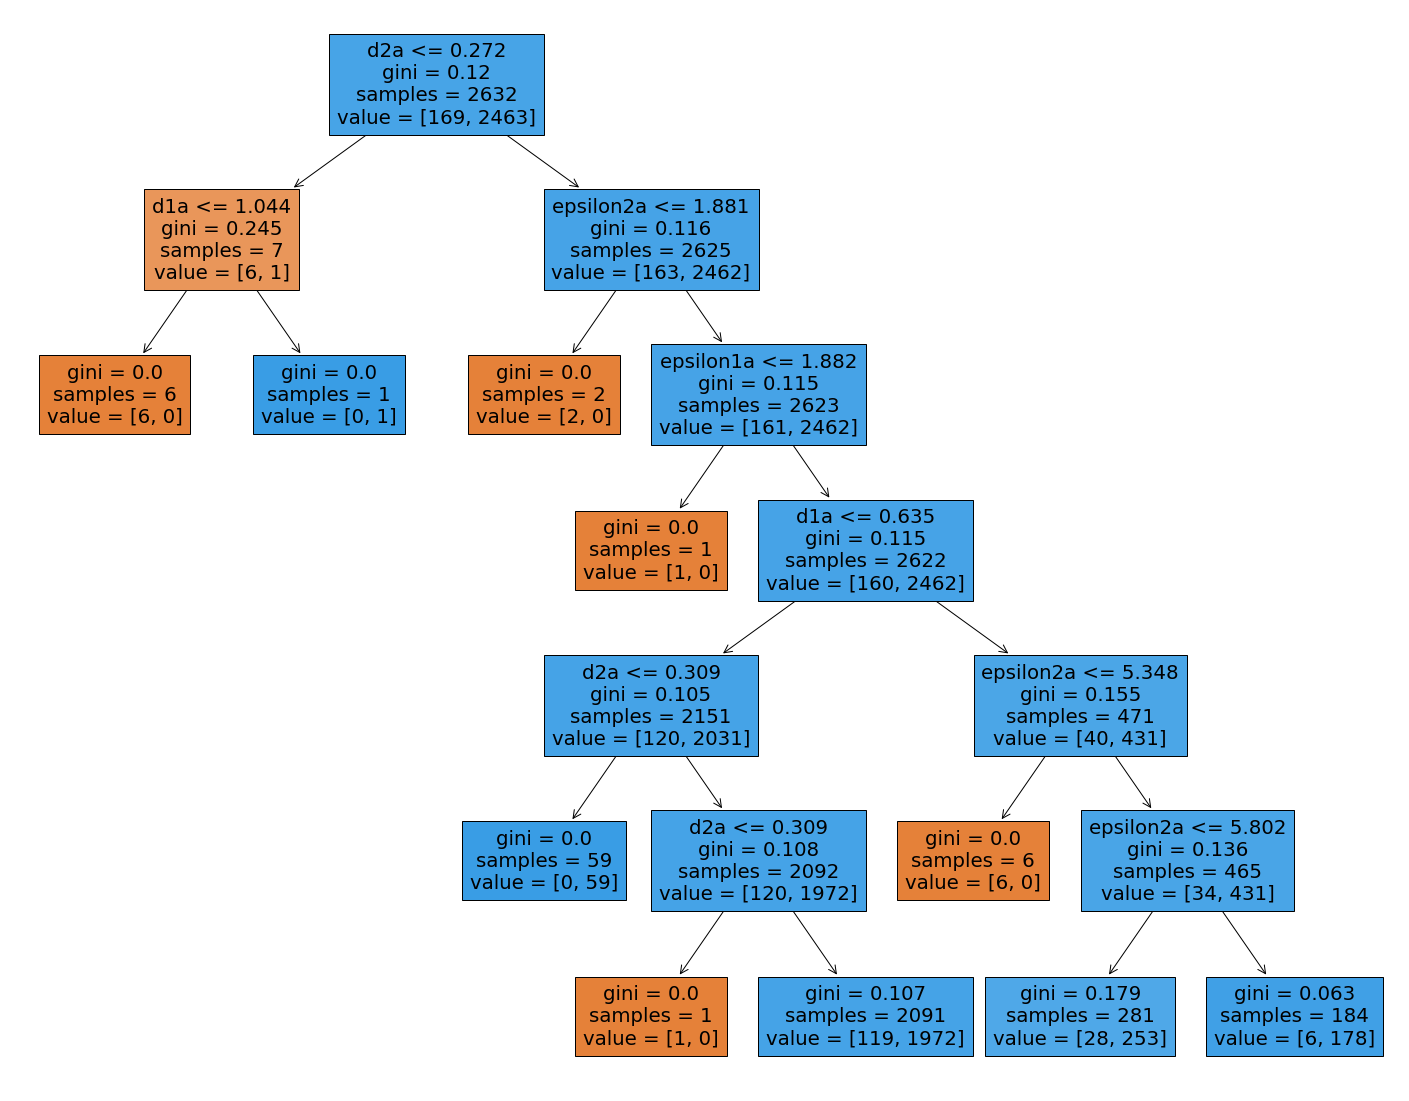

In [ ]:
#Mostrar modelo
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mytree2,
                   feature_names=grouptest.columns,
                   filled=True)